In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Formatting the display options for columns and float values
pd.set_option('display.max_columns',50)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# Reading the Loan dataset and storing in loan variable.
# using encoding = "ISO-8859-1" to avoid pandas encoding error
loan = pd.read_csv('loan.csv',encoding='ISO-8859-1',low_memory=False)

In [4]:
# checking the shape of the loan dataset
# inspecting the structure .
print(loan.shape)
print(loan.info())

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


- Loan dataset contains 39717 rows and 111 columns 
- loan dataset contains 74 float64 , 13 int64 and 24 object datatypes

In [5]:
# checking the head of the dataset
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


In [6]:
# checking the unique entries in the loan dataset
print(loan.id.nunique())
# checking whether the id column is unique or not
print(loan.id.is_unique)

39717
True


loan dataset contains 39717 unique customers and we can use ```id``` as the unique primary key 

In [7]:
# checking for the null values in the column wise 
null_cols = loan.isnull().sum()
null_cols = list(null_cols[null_cols.values>=(0.3*len(loan))].index)
# displaying the columns which having null values >=30% 
print(null_cols)
# dropping the columns which have >=30% of null columns 
loan.drop(columns=null_cols,inplace=True)

['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot

as shown above loan dataset columns contain many null values which is >=30 <br>
removing columns where null values in the column  is >= 30% of the total data

In [8]:
# checking for the null values in row wise >=30%
null_rows = loan.isnull().sum(axis=1)
print(list(null_rows[null_rows.values>=(0.3*len(loan))].index))


[]


as we can see above there are no rows with >=30% of missing values so no need of dropping the rows

In [9]:
# Removing rows with only one Unique value
loan = loan.loc[:,~(loan.nunique() == 1).values]

In [10]:
# displaying the dataset after removing null values and columns
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.00,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.00,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,0.00,0.00,2822.97,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,nan
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.00,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,0.00,0.00,9913.49,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,nan
39714,90395,90390,5000,5000,1325.00,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.00,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,0.00,0.00,5272.16,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,nan
39715,90376,89243,5000,5000,650.00,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.00,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,0.00,0.00,5174.20,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,nan


In [11]:
# Choosing the Relevant columns for the analysis
loan = loan.iloc[:,[0,2,3,4,5,6,8,9,11,12,13,14,15,16,18,21,22,30,43]]

we need to choose the columns which are useful for analysis so that we can get rid of the irrelevant columns

In [12]:
loan

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,total_acc,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00,36 months,10.65%,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,9,0.00
1,1077430,2500,2500,2500.00,60 months,15.27%,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,4,0.00
2,1077175,2400,2400,2400.00,36 months,15.96%,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,10,0.00
3,1076863,10000,10000,10000.00,36 months,13.49%,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,37,0.00
4,1075358,3000,3000,3000.00,60 months,12.69%,B,B5,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,OR,17.94,38,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.00,36 months,8.07%,A,A4,4 years,MORTGAGE,110000.00,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,40,nan
39713,90665,8500,8500,875.00,36 months,10.28%,C,C1,3 years,RENT,18000.00,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,9,nan
39714,90395,5000,5000,1325.00,36 months,8.07%,A,A4,< 1 year,MORTGAGE,100000.00,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,20,nan
39715,90376,5000,5000,650.00,36 months,7.43%,A,A2,< 1 year,MORTGAGE,200000.00,Not Verified,Jul-07,Fully Paid,other,MD,3.72,26,nan


In [13]:
# setting id as the index
loan.set_index('id',inplace=True)

In [14]:
# selecting only loan_status of full paid and charged off
loan = loan.loc[loan.loan_status !='Current']

Our aim is to analyse the variables which are strong indicators of default, we cannot use current loan status for the analysis

In [15]:
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,total_acc,pub_rec_bankruptcies
id,,,,,,,,,,,,,,,,,,
1077501,5000,5000,4975.00,36 months,10.65%,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,9,0.00
1077430,2500,2500,2500.00,60 months,15.27%,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,4,0.00
1077175,2400,2400,2400.00,36 months,15.96%,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,10,0.00
1076863,10000,10000,10000.00,36 months,13.49%,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,37,0.00
1075269,5000,5000,5000.00,36 months,7.90%,A,A4,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,12,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92187,2500,2500,1075.00,36 months,8.07%,A,A4,4 years,MORTGAGE,110000.00,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,40,nan
90665,8500,8500,875.00,36 months,10.28%,C,C1,3 years,RENT,18000.00,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,9,nan
90395,5000,5000,1325.00,36 months,8.07%,A,A4,< 1 year,MORTGAGE,100000.00,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,20,nan


In [16]:
# checking for the null values in the dataset
loan.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

we can see that there are some missing values in ```emp_length``` and ```pub_rec_bankruptcies``` so we need to impute or remove the null values  

In [17]:
# imputing the null value with not specified in emp_length
loan.emp_length = loan.emp_length.fillna('Not_specified')

C:\Users\Chivurala Vasavi\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Above we are imputing the null value with Not_specified because the customer who not specified the emp_length may have high default rate or the customer maybe self employed in that case he/she will lept emp_length as empty.

In [18]:
# checking for the frequency count of the loan_status
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

from above we can see that there are 32950 customers are fully paid the loan while 5627 are defaulted the loan

In [19]:
round((loan.groupby(['emp_length','loan_status'],as_index=False).size()/loan.groupby(['emp_length'],as_index=False).size())*100,0)

emp_length     loan_status
1 year         Charged Off   14.00
               Fully Paid    86.00
10+ years      Charged Off   16.00
               Fully Paid    84.00
2 years        Charged Off   13.00
               Fully Paid    87.00
3 years        Charged Off   14.00
               Fully Paid    86.00
4 years        Charged Off   14.00
               Fully Paid    86.00
5 years        Charged Off   14.00
               Fully Paid    86.00
6 years        Charged Off   14.00
               Fully Paid    86.00
7 years        Charged Off   15.00
               Fully Paid    85.00
8 years        Charged Off   14.00
               Fully Paid    86.00
9 years        Charged Off   13.00
               Fully Paid    87.00
< 1 year       Charged Off   14.00
               Fully Paid    86.00
Not_specified  Charged Off   22.00
               Fully Paid    78.00
dtype: float64

In [20]:
# here we are removing the null values in bankruptcies because we cannot impute value for this
loan= loan.loc[~(loan.pub_rec_bankruptcies.isna())]

In [21]:
# checking for the frequency count
loan.pub_rec_bankruptcies.value_counts(dropna=False)

0.00    36238
1.00     1637
2.00        5
Name: pub_rec_bankruptcies, dtype: int64

In [22]:
# checking still there is any null values in the columns
loan.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

Now we have removed all the null values from the dataset

In [23]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37880 entries, 1077501 to 112496
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37880 non-null  int64  
 1   funded_amnt           37880 non-null  int64  
 2   funded_amnt_inv       37880 non-null  float64
 3   term                  37880 non-null  object 
 4   int_rate              37880 non-null  object 
 5   grade                 37880 non-null  object 
 6   sub_grade             37880 non-null  object 
 7   emp_length            37880 non-null  object 
 8   home_ownership        37880 non-null  object 
 9   annual_inc            37880 non-null  float64
 10  verification_status   37880 non-null  object 
 11  issue_d               37880 non-null  object 
 12  loan_status           37880 non-null  object 
 13  purpose               37880 non-null  object 
 14  addr_state            37880 non-null  object 
 15  dti         

there are some columns having object type we need to convert them based on our requirement

In [24]:
# Removing % symbol and converting it to numeric type
loan.int_rate = loan.loc[:,'int_rate'].apply(lambda x: str(x).replace('%',"")) #str.replace('%',"")
loan.int_rate = loan.int_rate.astype('float')

removing the percentage symbol and converting in into float type

In [25]:
# converting pub_rec_bankruptcies to int64 type
loan.pub_rec_bankruptcies = loan.pub_rec_bankruptcies.astype('int64')

In [26]:
# converting object type to category type
loan.loan_status = loan.loan_status.astype('category')
loan.verification_status = loan.verification_status.astype('category')
loan.grade = loan.grade.astype('category')
loan.home_ownership = loan.home_ownership.astype('category')
loan.term = loan.term.astype('category')

we can see that above columns data are categorical in nature so we are converting from object to categorical type

In [27]:
# formatting the issued_d column to the datetime 
loan.issue_d = pd.to_datetime(loan.issue_d,format='%b-%y')

In [28]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37880 entries, 1077501 to 112496
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             37880 non-null  int64         
 1   funded_amnt           37880 non-null  int64         
 2   funded_amnt_inv       37880 non-null  float64       
 3   term                  37880 non-null  category      
 4   int_rate              37880 non-null  float64       
 5   grade                 37880 non-null  category      
 6   sub_grade             37880 non-null  object        
 7   emp_length            37880 non-null  object        
 8   home_ownership        37880 non-null  category      
 9   annual_inc            37880 non-null  float64       
 10  verification_status   37880 non-null  category      
 11  issue_d               37880 non-null  datetime64[ns]
 12  loan_status           37880 non-null  category      
 13  purpose  

Now we can see that our dataset is formatted accordingly.

In [29]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,total_acc,pub_rec_bankruptcies
count,37880.00,37880.00,37880.00,37880.00,37880.00,37880.00,37880.00,37880.00
mean,11067.09,10801.62,10367.23,11.96,68763.87,13.32,22.10,0.04
std,7364.01,7103.05,6999.22,3.71,63573.79,6.66,11.42,0.20
min,500.00,500.00,0.00,5.42,4000.00,0.00,2.00,0.00
25%,5375.00,5200.00,5000.00,8.94,40000.00,8.19,13.00,0.00
50%,9637.50,9600.00,8974.85,11.83,59000.00,13.41,20.00,0.00
75%,15000.00,15000.00,14200.00,14.46,82000.00,18.59,29.00,0.00
max,35000.00,35000.00,35000.00,24.40,6000000.00,29.99,90.00,2.00


we can see that there are some outliers in the columns of annual_inc,total_acc,loan_amnt we can observe there is difference in the values of mean and median 

In [30]:
# removing the outliers 
loan = loan.loc[loan.annual_inc < loan.annual_inc.quantile(0.99) ]
loan = loan.loc[loan.total_acc < loan.total_acc.quantile(0.99)]
loan = loan.loc[loan.loan_amnt < loan.loan_amnt.quantile(0.97)]
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,total_acc,pub_rec_bankruptcies
count,35921.00,35921.00,35921.00,35921.00,35921.00,35921.00,35921.00,35921.00
mean,10263.43,10042.01,9632.48,11.81,63695.37,13.33,21.38,0.04
std,6253.97,6051.50,5966.82,3.62,33893.21,6.66,10.62,0.21
min,500.00,500.00,0.00,5.42,4000.00,0.00,2.00,0.00
25%,5000.00,5000.00,5000.00,8.90,40000.00,8.20,13.00,0.00
50%,9000.00,9000.00,8400.00,11.71,56004.00,13.41,20.00,0.00
75%,14400.00,14000.00,13238.30,14.27,79992.00,18.60,28.00,0.00
max,27600.00,27600.00,27600.00,24.40,233004.00,29.99,54.00,2.00


from above we can see that we have removed the outliers from the dataset

## Data Analysis

## Derived Metrics

In [31]:
# creating a derived column from existing column
loan['loan_income_ratio'] = (loan.loan_amnt/loan.annual_inc)*100

Deriving loan_income_ratio from the loan_amnt/ annual_inc

In [32]:
# deriving the month and year columns from the issue_d date
loan['issue_month'] = loan.issue_d.dt.month
loan['issue_year'] = loan.issue_d.dt.year
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,total_acc,pub_rec_bankruptcies,loan_income_ratio,issue_month,issue_year
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000,5000,4975.00,36 months,10.65,B,B2,10+ years,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,9,0,20.83,12,2011
1077430,2500,2500,2500.00,60 months,15.27,C,C4,< 1 year,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,GA,1.00,4,0,8.33,12,2011
1077175,2400,2400,2400.00,36 months,15.96,C,C5,10+ years,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,10,0,19.59,12,2011
1076863,10000,10000,10000.00,36 months,13.49,C,C1,10+ years,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,37,0,20.33,12,2011
1075269,5000,5000,5000.00,36 months,7.90,A,A4,3 years,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,12,0,13.89,12,2011


from above we can see that we have derived month and year column

In [33]:
# creating bins.
loan['loan_amnt_span'] = pd.cut(loan['loan_amnt'], bins=[0, 5000, 10000, 15000, 20000, 25000,40000] , 
       labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above'])

loan['annual_inc_span'] = pd.cut(loan['annual_inc'], bins=[0, 25000, 50000, 75000, 100000,1000000], 
                                 labels=['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above'])

loan['int_rate_span'] = pd.cut(loan['int_rate'], bins=[0, 7.5, 10, 12.5, 15,20], 
                                  labels=['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above'])
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,total_acc,pub_rec_bankruptcies,loan_income_ratio,issue_month,issue_year,loan_amnt_span,annual_inc_span,int_rate_span
id,,,,,,,,,,,,,,,,,,,,,,,,
1077501,5000,5000,4975.00,36 months,10.65,B,B2,10+ years,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,9,0,20.83,12,2011,0-5000,0-25000,10-12.5
1077430,2500,2500,2500.00,60 months,15.27,C,C4,< 1 year,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,GA,1.00,4,0,8.33,12,2011,0-5000,25000-50000,15 and above
1077175,2400,2400,2400.00,36 months,15.96,C,C5,10+ years,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,10,0,19.59,12,2011,0-5000,0-25000,15 and above
1076863,10000,10000,10000.00,36 months,13.49,C,C1,10+ years,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,37,0,20.33,12,2011,5000-10000,25000-50000,12.5-15
1075269,5000,5000,5000.00,36 months,7.90,A,A4,3 years,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,12,0,13.89,12,2011,0-5000,25000-50000,7.5-10


above we have created bins for loan_amnt , annual_inc, int_rate , we can use these bins for our further analysis

## Univariate Analysis

In [34]:
# Function for Boxplot
def box_plot(df, column,figure_size=(6,4)):
    plt.figure(figsize=figure_size)
    sns.boxplot(y=column,data=df ,hue='loan_status')
    plt.show()

Above function is for univariate analysis , using these we can plot a box plot and derive some insights from it

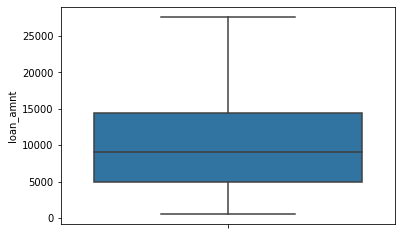

In [35]:
# analysis on Loan amount
box_plot(loan,'loan_amnt')

 ```By performing Univariate analysis on the Loan amount we can observe that Most of the Loan amount resides in the range of 5000 to 15000 only```

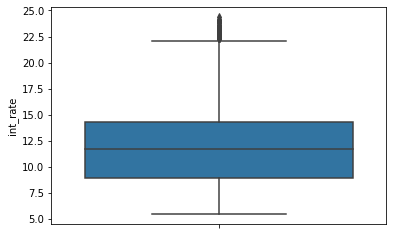

In [36]:
#analysis interest rate
box_plot(loan,'int_rate')

``` By performing Univariate analysis on interest rate we can observe most of the interest rate resides in 8.9 to 14.3 ```

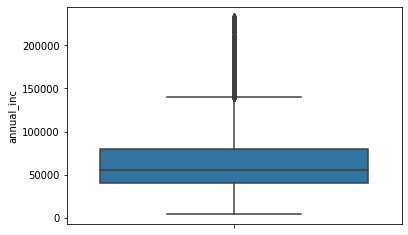

In [37]:
# analysis Annual income
box_plot(loan,'annual_inc')

``` By performing Univariate analysis on annual income most of the annual income resides in 40000 to 80000 ```

### Categorical variable

In [38]:
# function for Count_plot of categorical variable
def count_plot(df,column,hue=None,figure_size=(6,4),rotation='horizontal'):
    plt.figure(figsize=figure_size)
    ax = sns.countplot(x=column,data=df,hue=hue)
    total = len(df[column])
    for p in ax.patches:
        percentage = '{:1.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 - 0.18
        y = p.get_y() + p.get_height() + 0.02
        ax.annotate(percentage, (x, y))
    plt.xticks(rotation=rotation)
    plt.show()

```By using the above count_plot function we can get insights on the percentage of customers who fully paid and defaulted the loan```

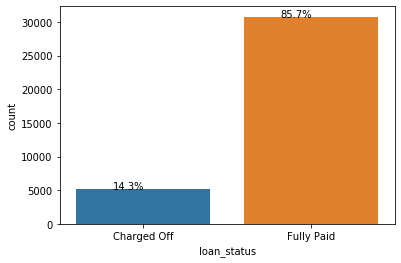

In [39]:
# analysis on loan status
count_plot(loan,'loan_status')

``` By performing Univariate analysis on loan status 14.3% of people are defaulted the loan ```

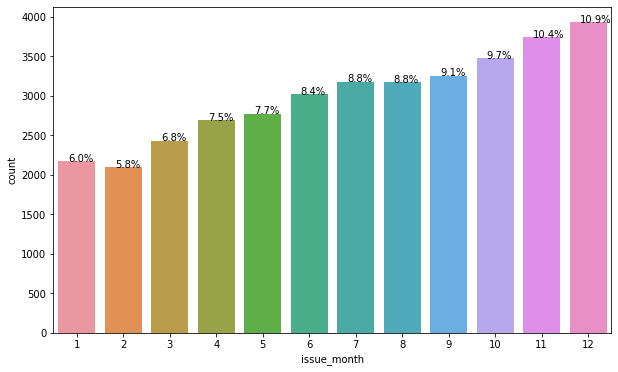

In [73]:
# analysis on loan month
count_plot(loan,'issue_month',figure_size=(10,6))

```Most of the applicants are applying loan in the month of november and december ```

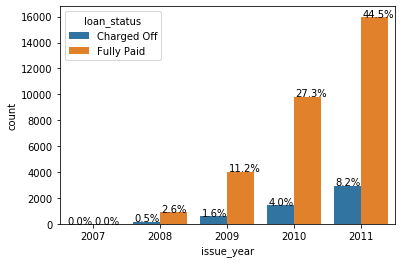

In [40]:
# analysis on loan year
count_plot(loan,'issue_year',hue='loan_status')

``` By performing Univariate analysis on issue year as year increases the number of applicants and default rate is increasing ```

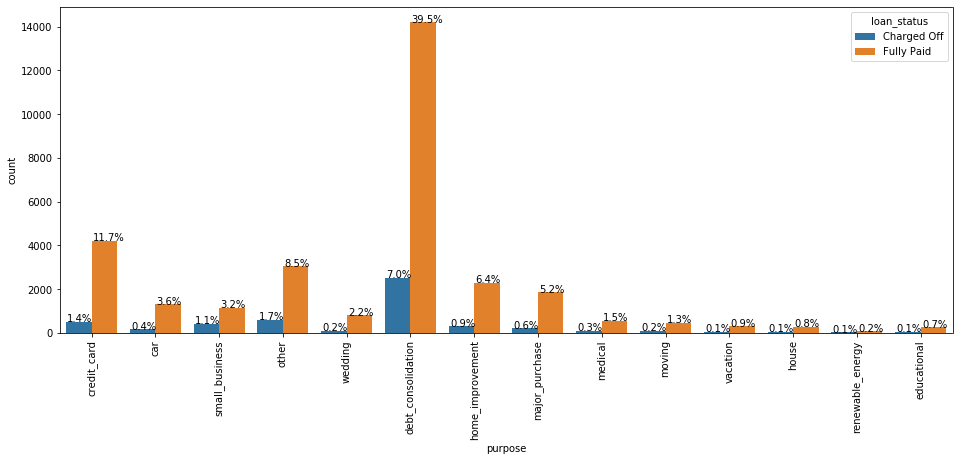

In [41]:
# analysis on loan purpose
count_plot(loan,'purpose',hue='loan_status',figure_size=(16,6),rotation='vertical')

``` By performing Univariate analysis on loan purpose 7% of people are defaulted the loan in debt_consilidation i.e took loan for paying other loans ```
- almost 48% of the applicants  are applied loan for paying the other loans(debt_consolidation)

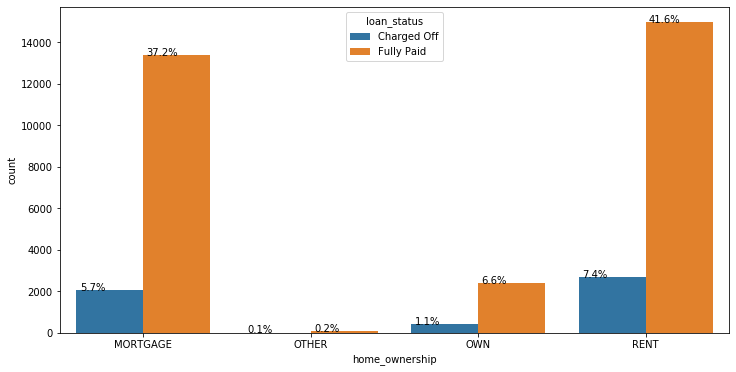

In [42]:
# analysis on home ownership
count_plot(loan,'home_ownership',hue='loan_status',figure_size=(12,6))

```By performing Univariate analysis on home ownership out of 49% ,7.4% are defaulted the loan whose home ownership is rent where as 43% of applicants mortaged their home ```

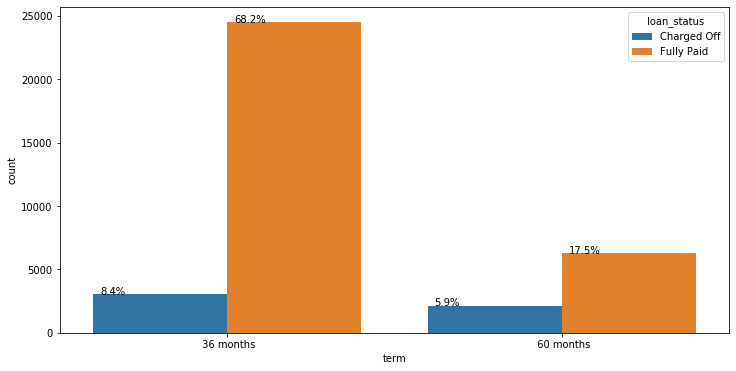

In [43]:
# analysis on loan term
count_plot(loan,'term',hue='loan_status',figure_size=(12,6))

``` 76.6 % of people are applied for the 36 months loan term```

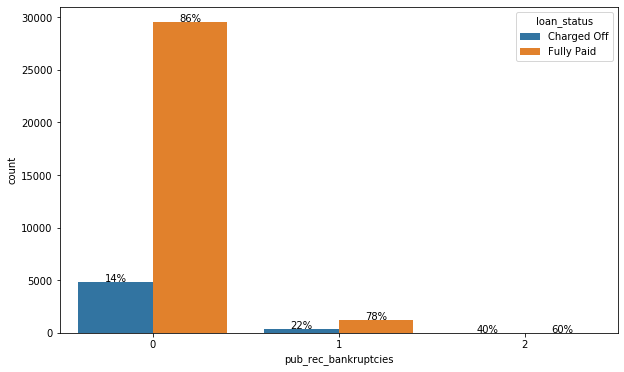

In [44]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='pub_rec_bankruptcies',data=loan,hue='loan_status')
total = len(loan['pub_rec_bankruptcies'])
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
plt.show()


```people who are  ```

## Bivariate Analysis 

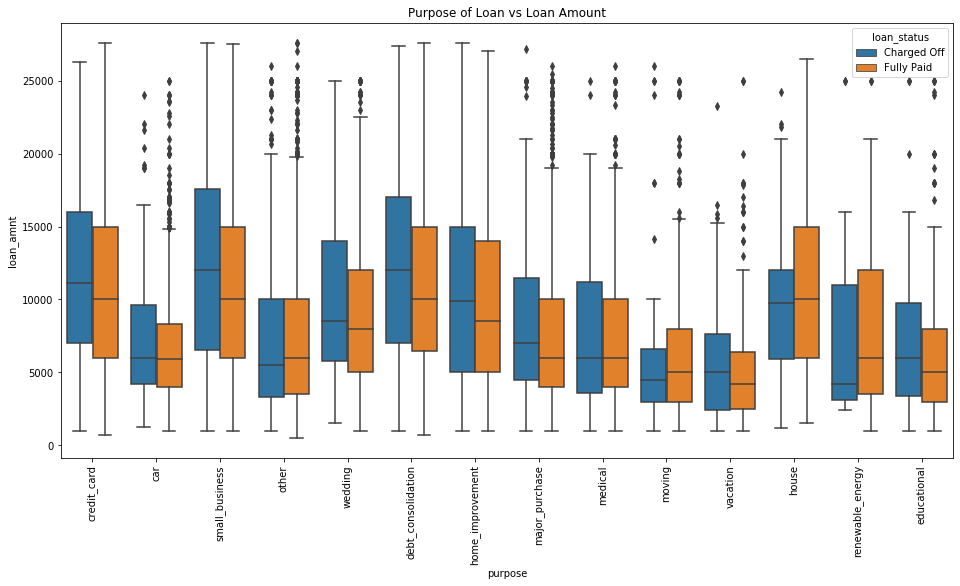

In [45]:
# Purpose of loan VS Loan status
plt.figure(figsize=(16,8))
sns.boxplot(x='purpose', y='loan_amnt', hue ='loan_status',data =loan)
plt.xticks(rotation='vertical')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

``` ```

In [46]:
# finding the correlations os the variables
correlation_matrix = loan.corr()
correlation_matrix 

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,total_acc,pub_rec_bankruptcies,loan_income_ratio,issue_month,issue_year
loan_amnt,1.00,0.98,0.95,0.25,0.37,0.08,0.24,-0.03,0.62,0.04,0.04
funded_amnt,0.98,1.00,0.97,0.26,0.37,0.08,0.23,-0.03,0.61,0.03,0.06
funded_amnt_inv,0.95,0.97,1.00,0.25,0.36,0.08,0.23,-0.03,0.59,0.04,0.16
int_rate,0.25,0.26,0.25,1.00,0.03,0.10,-0.09,0.09,0.19,0.02,-0.01
annual_inc,0.37,0.37,0.36,0.03,1.00,-0.11,0.37,-0.01,-0.36,0.01,0.00
dti,0.08,0.08,0.08,0.10,-0.11,1.00,0.24,0.01,0.14,0.01,0.08
total_acc,0.24,0.23,0.23,-0.09,0.37,0.24,1.00,0.00,-0.07,-0.00,0.03
pub_rec_bankruptcies,-0.03,-0.03,-0.03,0.09,-0.01,0.01,0.00,1.00,-0.02,-0.02,0.00
loan_income_ratio,0.62,0.61,0.59,0.19,-0.36,0.14,-0.07,-0.02,1.00,0.03,0.04
issue_month,0.04,0.03,0.04,0.02,0.01,0.01,-0.00,-0.02,0.03,1.00,-0.08


Above found the correlation between the variables 

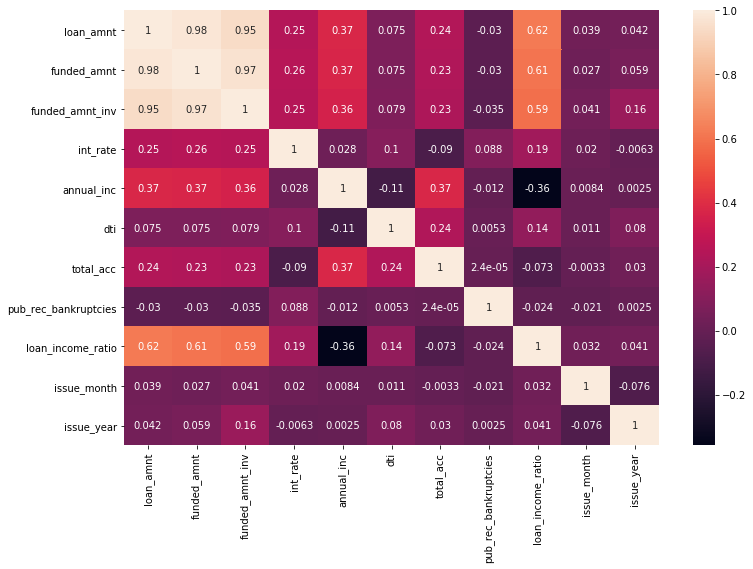

In [47]:
# Plotting the correlations using the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

By observing above heatmap can say that loan_amnt , funded_amnt, funded_amnt_inv are highly correlated , dti and annia;_inc are negatively correlated

## Probability charged off

In [48]:
#  crosstab function
def crosstab(df,column,margin=True):
    crosstab_data =  pd.crosstab(df[column],df['loan_status'],margins=margin)
    crosstab_data = crosstab_data.iloc[:-1,]
    crosstab_data['prob_chargeOff'] = round((crosstab_data['Charged Off']/crosstab_data['All'])*100,1)
    return crosstab_data

Above crosstab function is used to create a pivot table for loan status for a given column and it also finds the probability of charge off

In [49]:
# plotting bivariate analysis function
def bivariate_analysis(df,column,hue=None,figure_size=(8,5),rotation=0):
    fig, ax1 = plt.subplots(figsize=(14, 6))
    df[column].plot(marker='o',color = 'b',ax=ax1.twinx())
    barPlot = df.iloc[:,0:2]
    barPlot.plot.bar(stacked=True,ax=ax1,rot=rotation)
    plt.show()
    

Above function is used for bivariate analysis , we can pass the variables and the crosstab dataset and get insights as the result 

In [50]:
# filtering the states and choosing states which have highest no of applicants >400
state_filter = loan.addr_state.value_counts()
state_filter = state_filter[(state_filter < 400)]
loan_state_filter = loan.drop(labels = loan[loan.addr_state.isin(state_filter.index)].index)

In [51]:
# calling the crosstab function
cal_probability = crosstab(loan_state_filter,'addr_state',margin=True)
cal_probability

loan_status,Charged Off,Fully Paid,All,prob_chargeOff
addr_state,,,,
AZ,119,681,800,14.90
CA,1036,5521,6557,15.80
CO,84,608,692,12.10
CT,87,571,658,13.20
FL,454,2147,2601,17.50
GA,194,1067,1261,15.40
IL,183,1192,1375,13.30
MA,147,1056,1203,12.20
MD,144,800,944,15.30


From above pivot table we can see the states with percentage of charge off

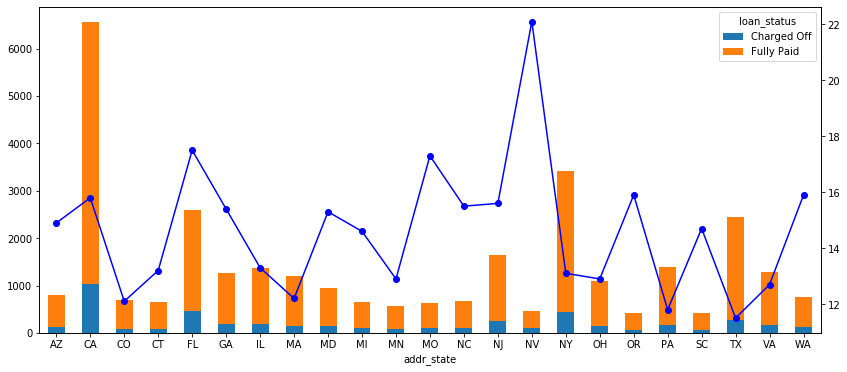

In [52]:
# Plot for states vs prob_chargeOff
bivariate_analysis(cal_probability,'prob_chargeOff')

By observing above plot we can say that applicants from state NV has the highest chance of defaulting the loan i.e 22%

In [53]:
# calling the crosstab function for purpose 
purpose_loan = crosstab(loan,'purpose')
purpose_loan

loan_status,Charged Off,Fully Paid,All,prob_chargeOff
purpose,,,,
car,156,1299,1455,10.70
credit_card,504,4208,4712,10.70
debt_consolidation,2510,14206,16716,15.00
educational,51,250,301,16.90
home_improvement,312,2282,2594,12.00
house,51,281,332,15.40
major_purchase,213,1857,2070,10.30
medical,101,550,651,15.50
moving,87,468,555,15.70


from above pivot table we can see the percentage of chargeOff by purpose 

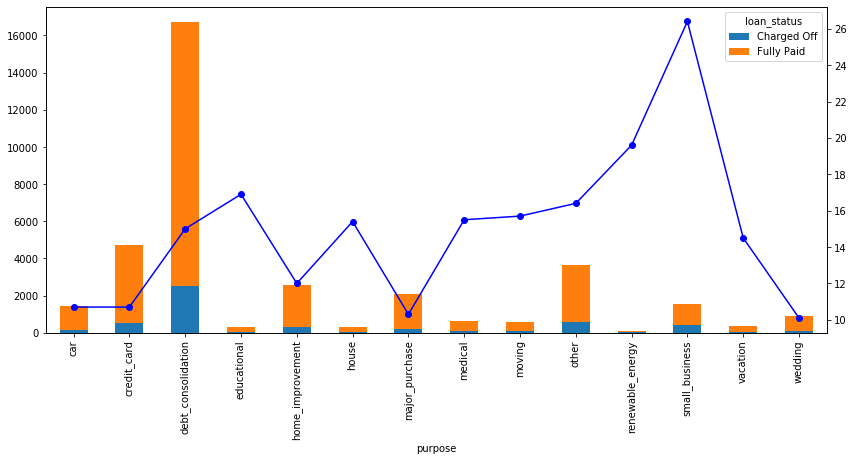

In [54]:
# Plot for purpose of loan VS prob_chargeOff
bivariate_analysis(purpose_loan,'prob_chargeOff',rotation=90)

By observing the above plot we can say the applicants who took loan for small_business has highest percentage of chargeOff 26%

In [55]:
# grade VS chargeOff calling crosstab function
grade_loan = crosstab(loan,'grade')
grade_loan

loan_status,Charged Off,Fully Paid,All,prob_chargeOff
grade,,,,
A,586,9053,9639,6.10
B,1345,9676,11021,12.20
C,1259,6062,7321,17.20
D,1028,3660,4688,21.90
E,610,1637,2247,27.10
F,245,529,774,31.70
G,80,151,231,34.60


above pivot table contains the information of grades with percentage of chargeOff

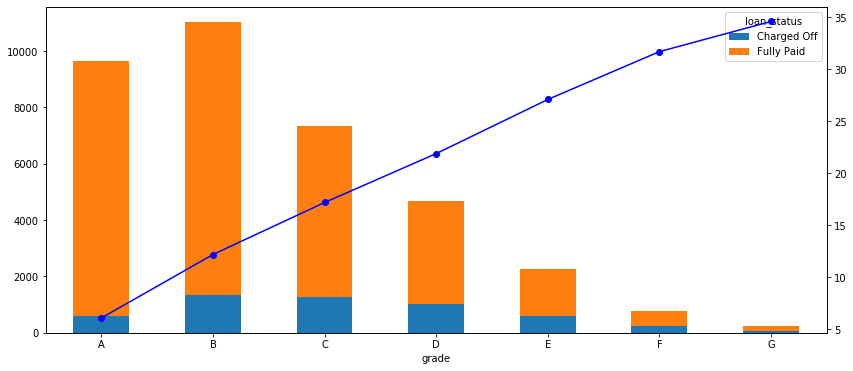

In [56]:
# plotting grade VS chargeOff
bivariate_analysis(grade_loan,'prob_chargeOff')

By observing the above plot we can say, as grade decreases the probability of chargeOff increases , the applicants with grade G has the highest percentage of chargeOff 35%

In [57]:
# sub-grade VS chargeOff
sub_grade_loan = crosstab(loan,'sub_grade')
sub_grade_loan.head()

loan_status,Charged Off,Fully Paid,All,prob_chargeOff
sub_grade,,,,
A1,30,1086,1116,2.70
A2,72,1367,1439,5.00
A3,98,1635,1733,5.70
A4,174,2580,2754,6.30
A5,212,2385,2597,8.20


Above pivot table gives the information of the subgrades and their percentage of default

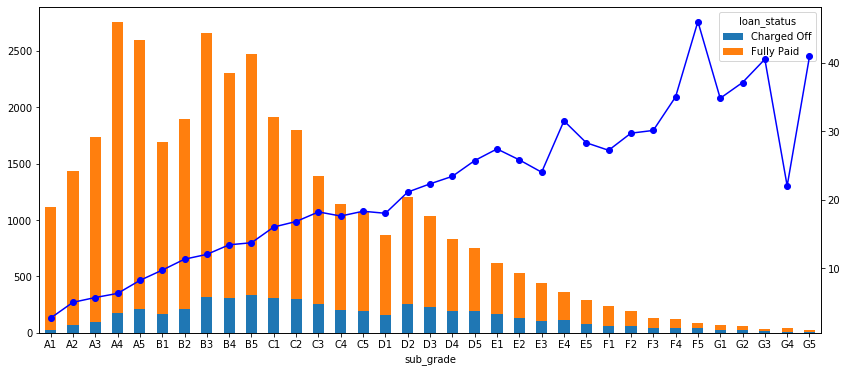

In [58]:
# plotting sub-grade VS chargeOff
bivariate_analysis(sub_grade_loan,'prob_chargeOff')

from above plot we can observe applicants with subgrade F5 has the highest percentage of chargeOff 46%

In [59]:
# bankruptcies vs chargeOff
bankruptcies = crosstab(loan,'pub_rec_bankruptcies')
bankruptcies

loan_status,Charged Off,Fully Paid,All,prob_chargeOff
pub_rec_bankruptcies,,,,
0,4800,29520,34320,14.00
1,351,1245,1596,22.00
2,2,3,5,40.00


above pivot table gives information about bankruptcies and their corresponding percentage of chargeOff

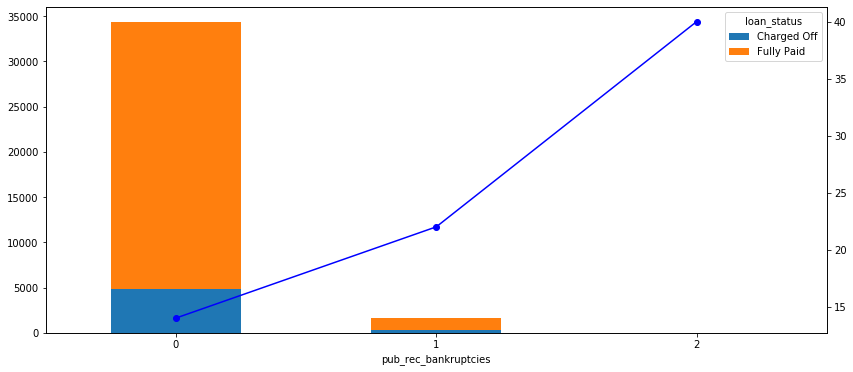

In [60]:
# plotting bankruptcies vs chargeOff
bivariate_analysis(bankruptcies,'prob_chargeOff',rotation='horizontal')

By observing the above plot we can observe that as bankruptcies increases the percentage of chargeOff increases applicants with 1 bankruptice has 22% of chargeOff whereas applicants with 2 bankruptice has 40% chargeOff

In [61]:
# int rate span VS Prob chargeOff
int_rate_span = crosstab(loan,'int_rate_span')
int_rate_span

loan_status,Charged Off,Fully Paid,All,prob_chargeOff
int_rate_span,,,,
0-7.5,251,4965,5216,4.80
7.5-10,538,5944,6482,8.30
10-12.5,1134,7619,8753,13.00
12.5-15,1389,7019,8408,16.50
15 and above,1627,4886,6513,25.00


above pivot table gives information about the int_rate range and their percentage of chargeOff

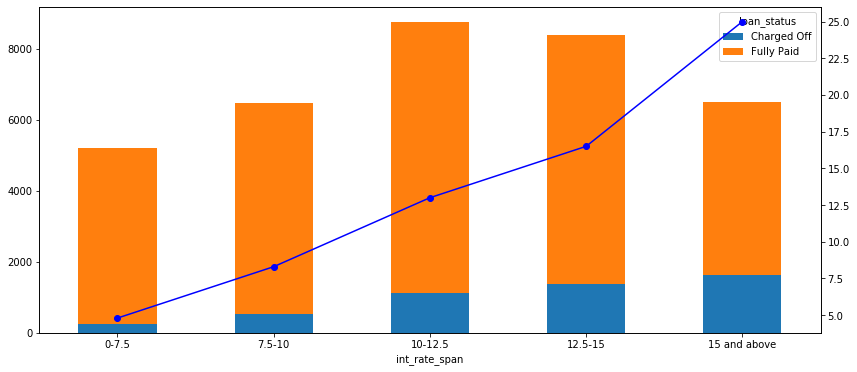

In [62]:
# plotting int rate span VS Prob chargeOff
bivariate_analysis(int_rate_span,'prob_chargeOff')

By observing the above plot we can say that as int_rate_ range increases the percentage of default increases ,applicants who has the int_rate above 15 has highest percentage of chargeOff 25%

In [63]:
# annual_inc VS Prob chargeOff
annual_inc = crosstab(loan,'annual_inc_span')
annual_inc

loan_status,Charged Off,Fully Paid,All,prob_chargeOff
annual_inc_span,,,,
0-25000,479,1990,2469,19.40
25000-50000,2077,10457,12534,16.60
50000-75000,1554,9553,11107,14.00
75000-100000,620,4858,5478,11.30
100000 and above,423,3910,4333,9.80


above pivot table gives infotmation about the annual income range and their percent of chargeOff

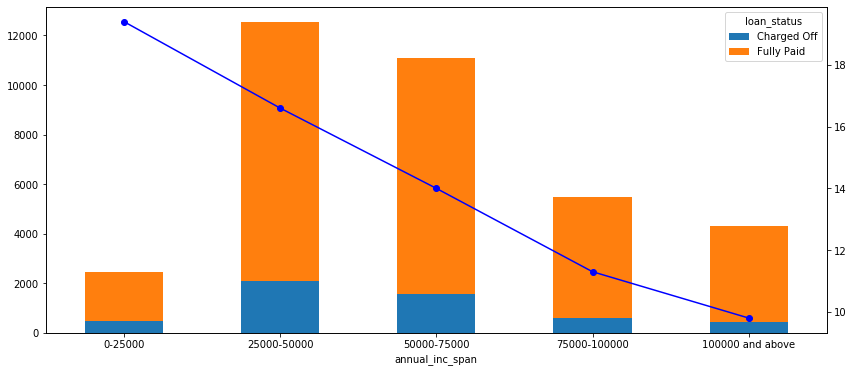

In [64]:
# plotting annual_inc VS Prob chargeOff
bivariate_analysis(annual_inc,'prob_chargeOff',rotation='horizontal')

By observing above plot we can say that applicants who have annual income <25000 has the highest chance of defaulting the loan i.e 20% , and as the income increases the percentage of chargeOff decreases

In [65]:
# loan amount VS Prob of Charged_off
loan_amnt = crosstab(loan,'loan_amnt_span')
loan_amnt

loan_status,Charged Off,Fully Paid,All,prob_chargeOff
loan_amnt_span,,,,
0-5000,1277,7900,9177,13.90
5000-10000,1598,10782,12380,12.90
10000-15000,1018,6385,7403,13.80
15000-20000,712,3439,4151,17.20
20000-25000,501,2153,2654,18.90
25000 and above,47,109,156,30.10


above pivot table gives information about the loan amount range and their percentage of chargeOff 

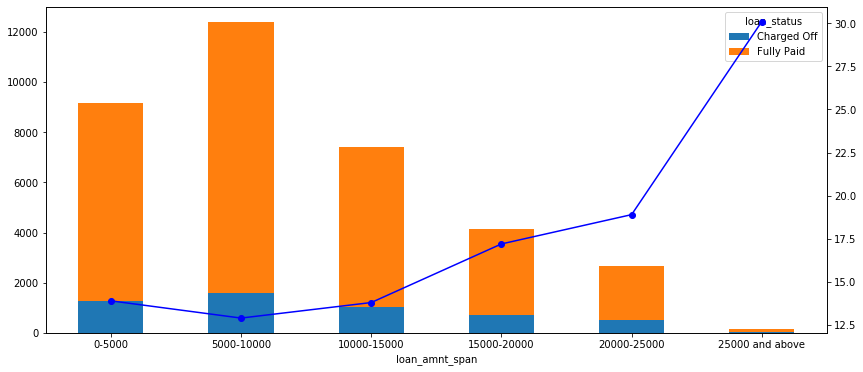

In [66]:
# plotting loan amount VS Prob of Charged_off
bivariate_analysis(loan_amnt,'prob_chargeOff',rotation='horizontal')

By observing the above plot we can say that as applicants who have high loan amount has the high percentage of chargeOff 30%  and as loan amount increases the percentage of default increases

In [67]:
# emp_length VS prob of chargeOff
emp_length = crosstab(loan,'emp_length')
emp_length

loan_status,Charged Off,Fully Paid,All,prob_chargeOff
emp_length,,,,
1 year,429,2550,2979,14.40
10+ years,1164,6473,7637,15.20
2 years,528,3516,4044,13.10
3 years,519,3280,3799,13.70
4 years,419,2739,3158,13.30
5 years,430,2583,3013,14.30
6 years,285,1746,2031,14.00
7 years,236,1365,1601,14.70
8 years,187,1121,1308,14.30


above pivot table gives information about the employee lenth and their default percentage

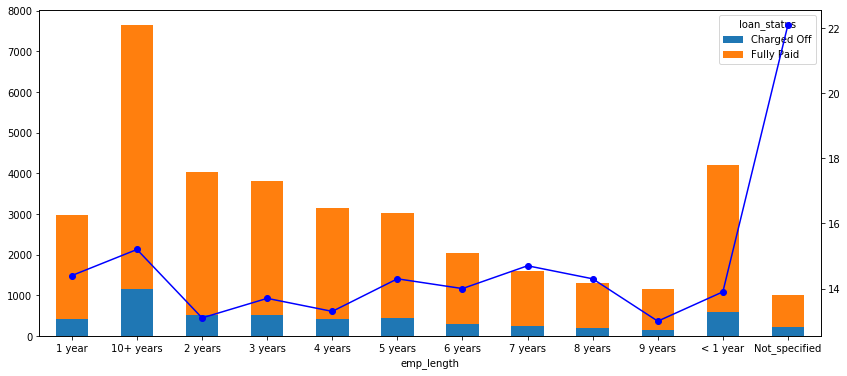

In [68]:
# plotting emp_length VS prob of chargeOff
bivariate_analysis(emp_length,'prob_chargeOff',rotation='horizontal')

By observing the above plot we can say that applicants who has not specified their employe length / self employeed are having thr highest percentage of default 22%

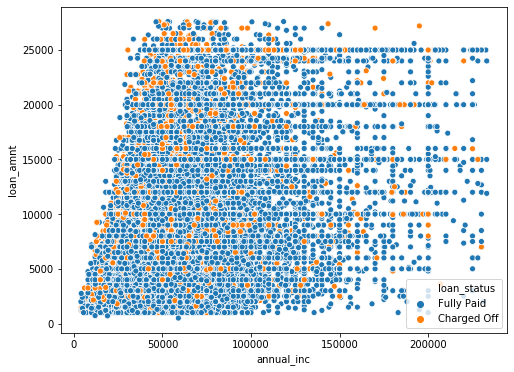

In [69]:
plt.figure(figsize=(8,6))
sns.scatterplot(y='loan_amnt',x='annual_inc',data=loan,hue='loan_status')
plt.show()

By observing above plot we can say that applicants who having annual income in range of 25000 to 75000 and loan amount > 15000 has highest default rate 

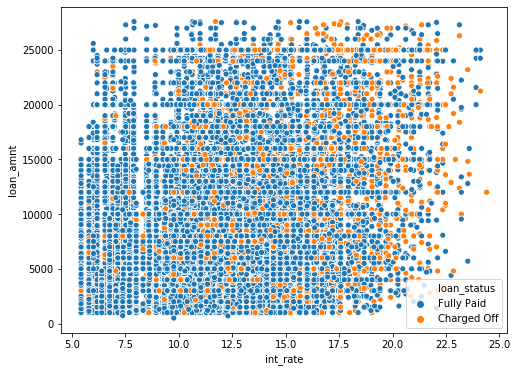

In [70]:
plt.figure(figsize=(8,6))
sns.scatterplot(y='loan_amnt',x='int_rate',data=loan,hue='loan_status')
plt.show()

Applicants who has high loan amount and high int rate has the highest chargeOff